# Clustering the Olivetti Faces

## Setup

In [1]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("Clustering-and-Classifying-Olivetti-Faces"):
    raise ValueError("Please change working directory to 'path/Clustering-and-Classifying-Olivetti-Faces' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/Clustering-and-Classifying-Olivetti-Faces


In [2]:
!pip install -r requirements.txt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fetch Olivetti Faces Dataset

In [4]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
list(olivetti)

['data', 'images', 'target', 'DESCR']

In [5]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [6]:
X_olivetti = olivetti.data
y_olivetti = olivetti.target

In [7]:
x_square_len = int(np.sqrt(X_olivetti.shape[1]))

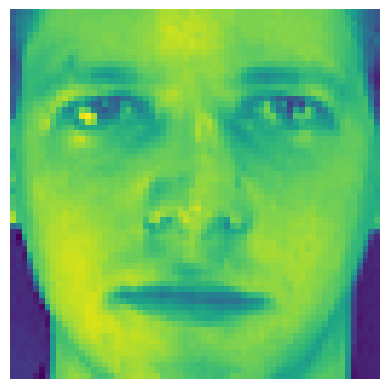

In [8]:
plt.imshow(X_olivetti[0].reshape(x_square_len, x_square_len))
plt.axis("off")
plt.show()

## Split data

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_valid_test, y_train, y_valid_test = train_test_split(X_olivetti, y_olivetti, test_size=0.3, stratify=y_olivetti, random_state=42)

In [10]:
(pd.Series(y_train).value_counts() / len(y_train)).head()

15    0.025
3     0.025
22    0.025
31    0.025
38    0.025
Name: count, dtype: float64

In [11]:
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=1/3, stratify=y_valid_test)

In [12]:
(pd.Series(y_valid).value_counts() / len(y_train)).head()

9     0.007143
8     0.007143
38    0.007143
30    0.007143
11    0.007143
Name: count, dtype: float64

## Simple K-mean

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=40, n_init=10, random_state=42)

kmeans.fit(X_train)

KMeans(n_clusters=40, n_init=10, random_state=42)

Cluster 0


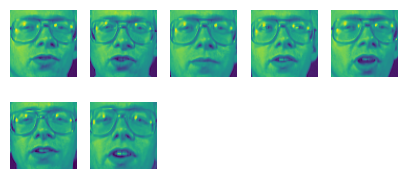

Cluster 1


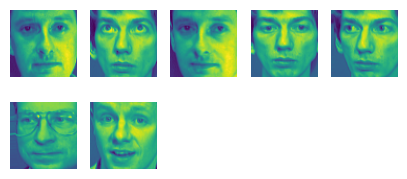

Cluster 2


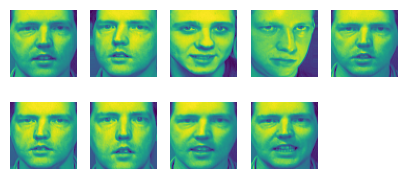

Cluster 3


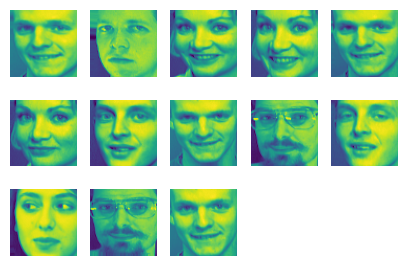

Cluster 4


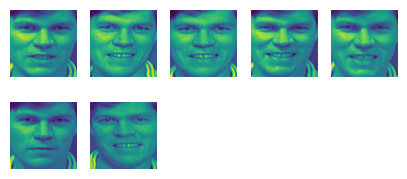

In [34]:
for cluster_id in np.unique(kmeans.labels_)[:5]:
    faces = X_train[kmeans.labels_==cluster_id]
    n_rows = (len(faces) - 1) // 5 + 1
    print(f"Cluster {cluster_id}")
    plt.figure(figsize=(5, n_rows * 1.1))
    for i, face in enumerate(faces):
        plt.subplot(n_rows, 5, i + 1)
        plt.imshow(face.reshape(64, 64))
        plt.axis("off")
    plt.show()